<a href="https://colab.research.google.com/github/Alexandre77777/computer_math/blob/main/9.%20%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D1%86%D0%B8%D1%8F%20%D1%81%D0%B8%D0%B3%D0%BD%D0%B0%D0%BB%D0%BE%D0%B2%20%D0%B8%20%D0%BF%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F%20%D0%A4%D1%83%D1%80%D1%8C%D0%B5/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%969_%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D1%86%D0%B8%D1%8F_%D1%81%D0%B8%D0%B3%D0%BD%D0%B0%D0%BB%D0%BE%D0%B2_%D0%B8_%D0%BF%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F_%D0%A4%D1%83%D1%80%D1%8C%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №9. Генерация сигналов и преобразования Фурье

# Блок №1. Базовый уровень

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
from scipy.signal import spectrogram

## **Задание 1: Генерация сигналов**



В этом задании вам нужно создать различные виды сигналов. Сигналы являются основой цифровой обработки сигналов, и умение их генерировать является важным навыком.













1. **Синусоидальный сигнал**: Синусоидальный сигнал можно представить как $A \sin(2\pi ft + \phi)$, где $A$ - амплитуда, $f$ - частота, $\phi$ - фаза.

- Создайте функцию, которая принимает эти параметры, а также длительность сигнала, и возвращает сгенерированный сигнал.

### Пример:



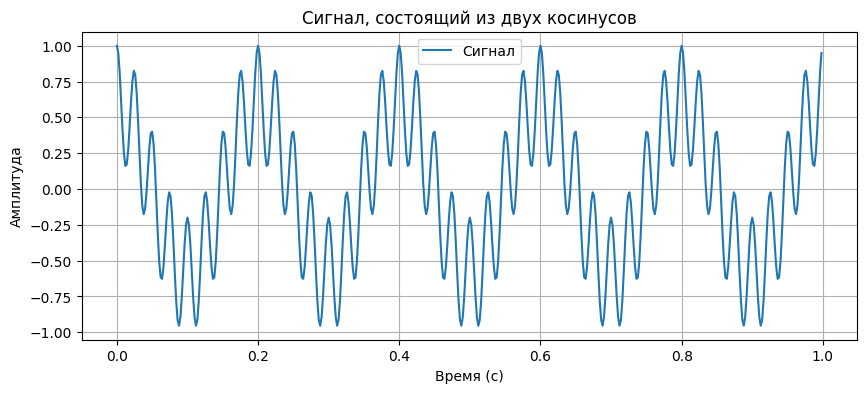

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Параметры времени
T = 1.0         # длительность сигнала в секундах
fs = 500.0      # частота дискретизации (в герцах)
t = np.arange(0, T, 1/fs) # массив времени

# Создание сигнала
f1 = 5.0        # частота первого косинуса
f2 = 40.0       # частота второго косинуса
a1 = 0.6        # амплитуда первого косинуса
a2 = 0.4        # амплитуда второго косинуса
signal = a1*np.cos(2*np.pi*f1*t) + a2*np.cos(2*np.pi*f2*t)

# Визуализация сигнала
plt.figure(figsize=(10, 4))
plt.plot(t, signal, label='Сигнал')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Cигнал, состоящий из двух косинусов')
plt.legend()
plt.grid(True)
plt.show()


### Ваш код:

In [87]:
import sympy as sp
def generateSignal(eq, T, fs, sub):
    f_eq = sp.lambdify(t, eq.subs(sub), "numpy")
    time = np.linspace(0, T, fs)
    return f_eq(time), time

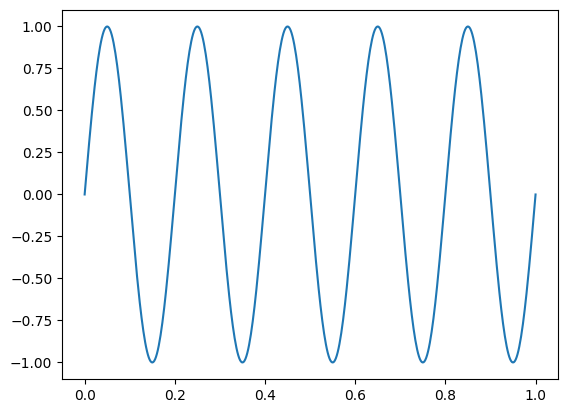

A*sin(6.28318530717959*f*t + phi)

In [88]:
from sympy import symbols, sin, pi
A1, f1, t, phi1 = symbols('A f t phi')
eq1 = A1 * sin(2 * np.pi * f1 * t + phi1)

signal1, time1 = generateSignal(eq1, 1, 500, {'A': 1, 'f': 5, 'phi': 0})

plt.figure()
plt.plot(time1, signal1)
plt.show()

eq1

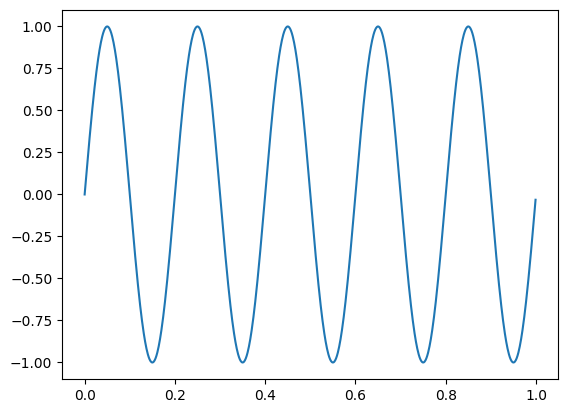

In [ ]:
# Пример

2. **Сумма синусоид**: Сигнал, состоящий из суммы двух синусоид, можно представить как $A_1 \sin(2\pi f_1t + \phi_1) + A_2 \sin(2\pi f_2t + \phi_2)$.

- Создайте функцию, которая принимает параметры для двух синусоид, а также длительность сигнала, и возвращает сгенерированный сигнал.

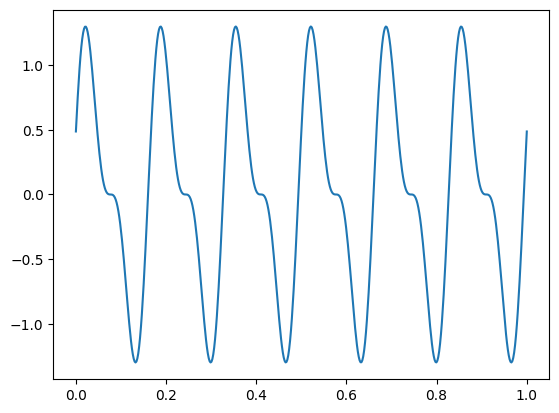

A1*sin(2*pi*f1*t + phi1) + A2*sin(2*pi*f2*t + phi2)

In [90]:
from sympy import symbols, sin, pi
A1, f1, t, phi1, A2, f2, phi2 = symbols('A1 f1 t phi1 A2 f2 phi2')
eq2 = A1 * sin(2 * pi * f1 * t + phi1) + A2 * sin(2 * pi * f2 * t + phi2)

signal2, t2 = generateSignal(eq2, 1, 500, {'A1': 1, 'f1': 6, 'phi1': 0.25, 'A2': 0.5, 'f2': 12, 'phi2': 0.5})

plt.figure()
plt.plot(t2, signal2)
plt.show()

eq2

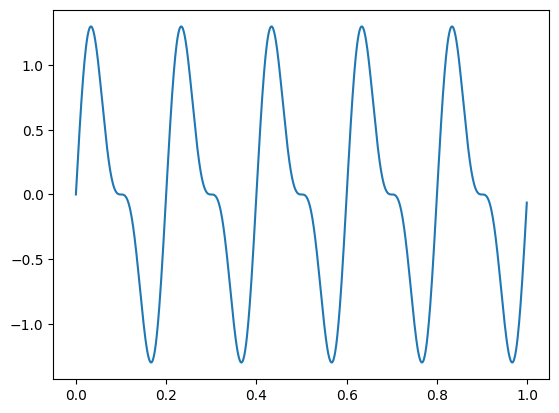

In [ ]:
# Пример

3. **Шумовой сигнал**: Шумовой сигнал (или белый шум) можно сгенерировать как случайные значения из нормального распределения.

- Создайте функцию, которая принимает амплитуду шума и длительность сигнала, и возвращает сгенерированный шумовой сигнал.

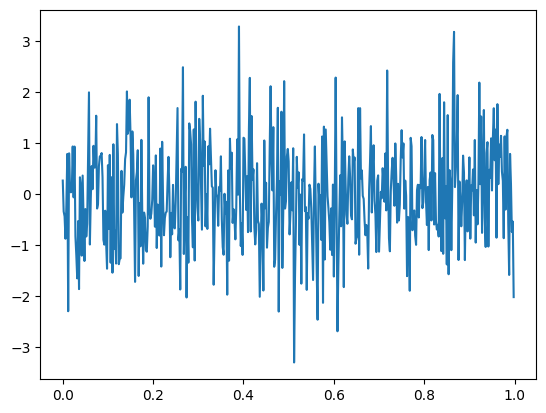

In [8]:
def noise_signal(a, T):
    t = np.arange(0, T, 1/500)
    signal = a * np.random.normal(0, 1, len(t))
    return signal, t

signal3, t3 = noise_signal(1, 1)

plt.figure()
plt.plot(t3, signal3)
plt.show()

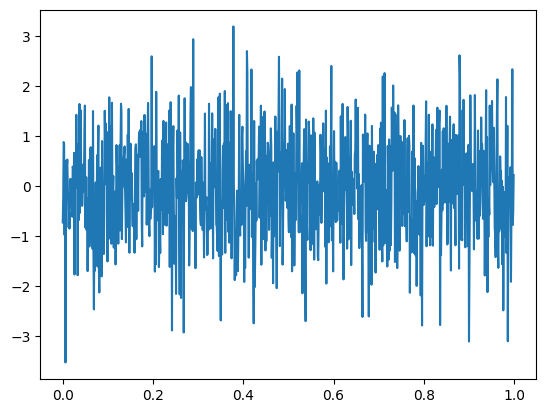

In [ ]:
# Пример

4. **Синусоида плюс шум**: Сигнал, который представляет собой сумму синусоиды и шума, можно сгенерировать путем сложения синусоидального и шумового сигналов.
- Создайте функцию, которая принимает параметры для синусоиды и шума, а также длительность сигнала, и возвращает сгенерированный сигнал.

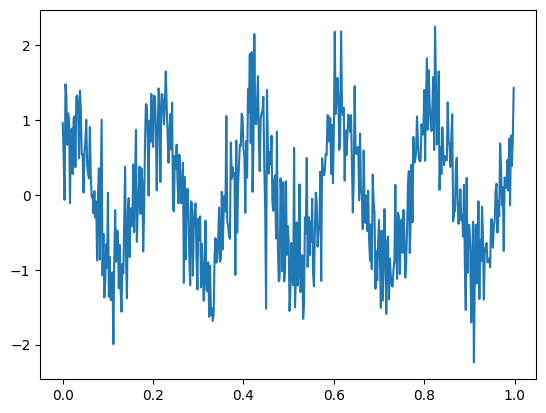

In [9]:
def noise_sin(a1, f, phi, a2, T):
    t = np.arange(0, T, 1 / 500)
    signal = a1*np.sin(2*np.pi*f*t + phi) + a2 * np.random.normal(0, 1, len(t))
    return t, signal

t4, signal4 = noise_sin(1, 5, 1, 0.5, 1)

plt.figure()
plt.plot(t4, signal4)
plt.show()

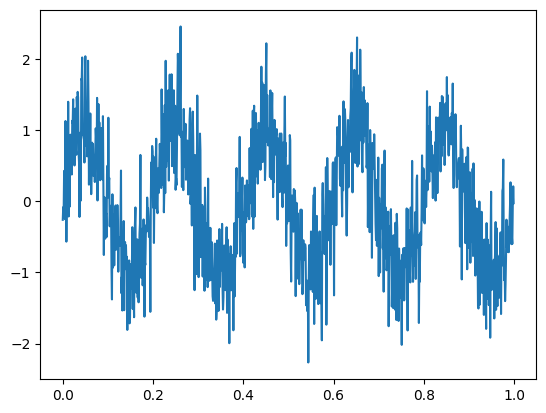

In [ ]:
# Пример

## **Задание 2: Преобразование Фурье**


Преобразование Фурье позволяет перейти от временного представления сигнала к частотному. Это основной инструмент для анализа сигналов. Создайте функцию, которая принимает сигнал и возвращает его преобразование Фурье.


1. Примените преобразование Фурье к синусоидальному сигналу и визуализируйте результат.


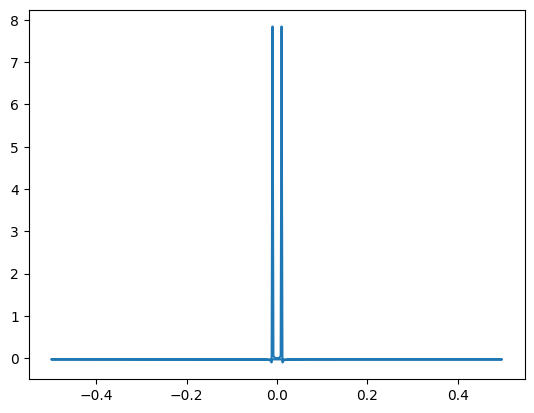

In [89]:
from scipy.fftpack import fft, fftfreq

spectrum1 = fft(signal1)
freq = fftfreq(500)

plt.plot(freq, spectrum1)
plt.show()

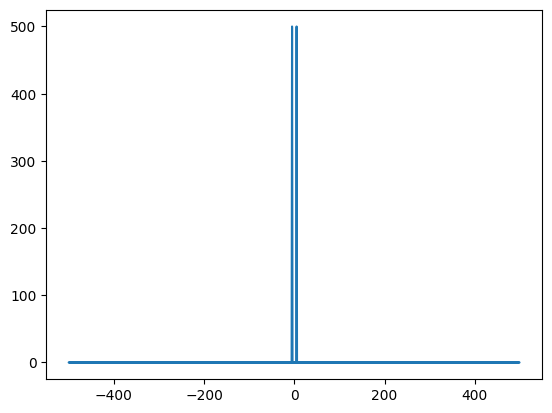

In [ ]:
# Пример

2. Примените преобразование Фурье к сигналу, состоящему из суммы двух синусоид, и визуализируйте результат.


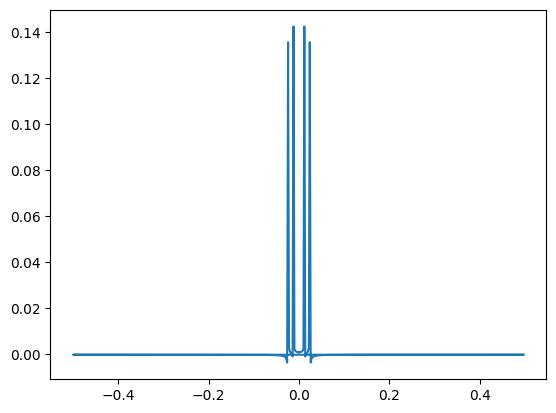

In [91]:
spectrum2 = ifft(signal2)
freq = fftfreq(500)
plt.plot(freq, spectrum2)
plt.show()

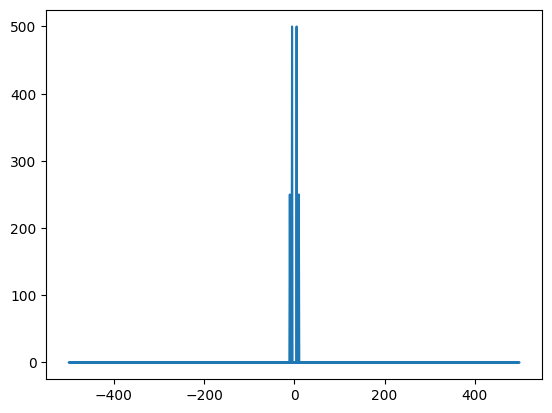

In [ ]:
# Пример

3. Примените преобразование Фурье к шумовому сигналу и визуализируйте результат.


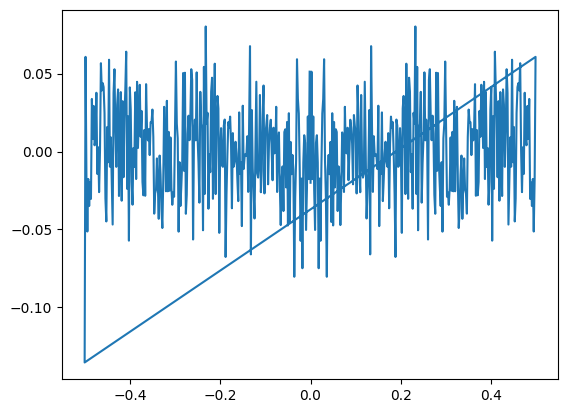

In [65]:
spectrum3 = ifft(signal3)
freq = fftfreq(500)
plt.plot(freq, spectrum3)
plt.show()

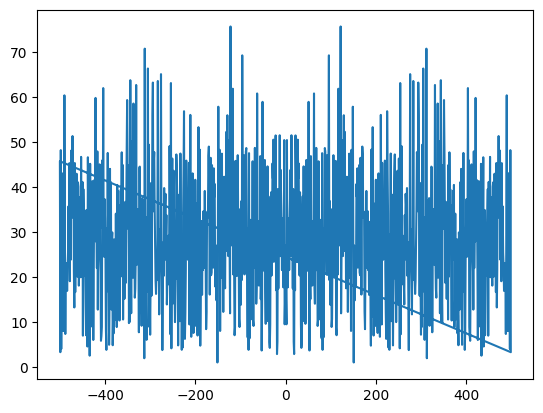

In [ ]:
# Пример

4. Примените преобразование Фурье к сигналу, который представляет собой сумму синусоиды и шума, и визуализируйте результат.

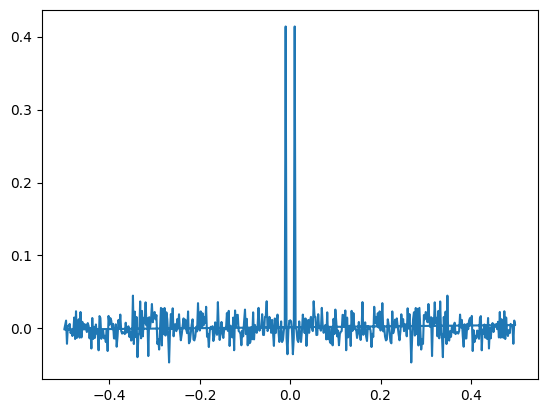

In [66]:
spectrum4 = ifft(signal4)
freq = fftfreq(500)
plt.plot(freq, spectrum4)
plt.show()

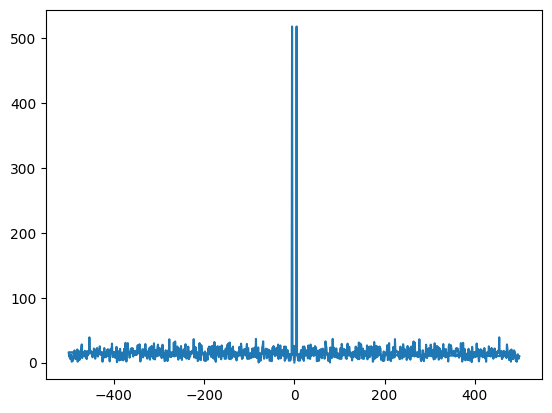

In [ ]:
# Пример

## **Задание 3: Фильтрация сигналов**

Фильтрация сигналов позволяет улучшить качество сигнала, убрав нежелательные частоты. Создайте функцию, которая принимает сигнал и частоту среза, и возвращает отфильтрованный сигнал.




1. Создайте функцию для фильтрации сигнала с использованием преобразования Фурье.

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from scipy.signal import firwin, convolve

def filter_signal(signal, cutoff_freq, fs):
    normalized_cutoff_freq = cutoff_freq / (fs / 2)
    filter_taps = firwin(100, normalized_cutoff_freq) # я еще наешл signal.butter, вроде тоже неплохой вариант
    filtered_signal = convolve(signal, filter_taps, mode='same')
    return filtered_signal


In [98]:
# Пример

2. Примените эту функцию к сигналу, который представляет собой сумму синусоиды и шума, и визуализируйте результаты до и после фильтрации.

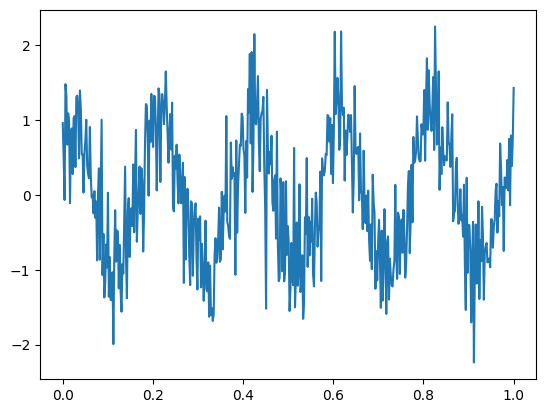

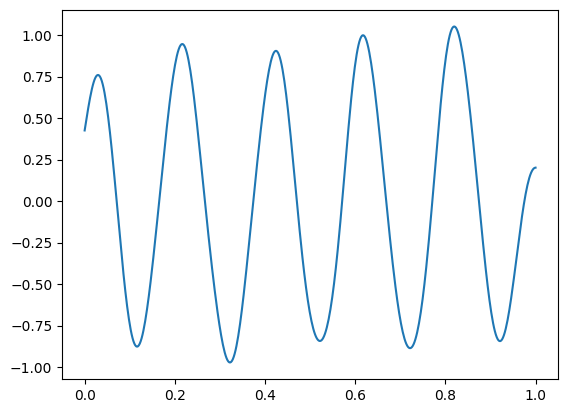

In [120]:
t_3_2 = np.linspace(0, 1, 500)
plt.plot(t_3_2, signal4)
plt.show()
filter = filter_signal(signal4, 20, 1000)
plt.plot(t_3_2,filter)
plt.show()

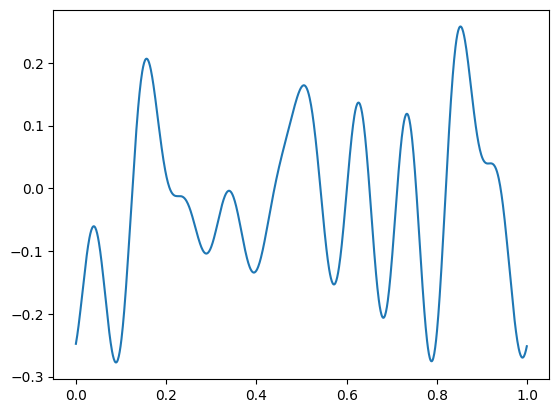

In [ ]:
# Пример

## **Задание 4: Анализ сигналов**

Анализ сигналов включает в себя различные методы и техники для изучения и понимания сигналов. Создайте функцию, которая принимает сигнал и возвращает его спектрограмму (**scipy.signal.spectrogram**).


**Спектрограмма** - это визуальное представление спектра частот сигнала во времени. Она показывает, какие частоты присутствуют в сигнале в каждый момент времени. Вот как правильно понимать спектрограмму:

- **Ось X**: Это время. Она показывает продолжительность сигнала. Каждый столбец на спектрограмме представляет собой отдельный момент времени.

- **Ось Y**: Это частота. Она показывает различные частоты, которые присутствуют в сигнале. Каждая строка на спектрограмме представляет собой отдельную частоту.

- **Значение**: Значение в каждой точке (x, y) показывает амплитуду (или интенсивность) данной частоты в данное время. Обычно более яркие цвета означают большую амплитуду, а более темные цвета - меньшую амплитуду.

Таким образом, спектрограмма позволяет вам видеть, как меняется спектральный состав сигнала во времени. Это может быть полезно во многих областях, включая анализ речи, музыку, радиосигналы и многое другое. Например, в анализе речи вы можете видеть, как меняются форманты (основные частоты) во время произношения различных звуков. В музыке вы можете видеть, как меняются ноты во время проигрывания песни.

1. Создайте функцию для вычисления и визуализации спектрограммы сигнала.


In [68]:
def make_spectrogram(signal, fs):
    f, t, Sxx = spectrogram(signal, fs=fs, nperseg=300, noverlap=200)
    Sxx = np.log10(Sxx) * 10
    return f, t, Sxx

2. Примените эту функцию к различным сигналам, которые вы сгенерировали и проанализировали в предыдущих заданиях.

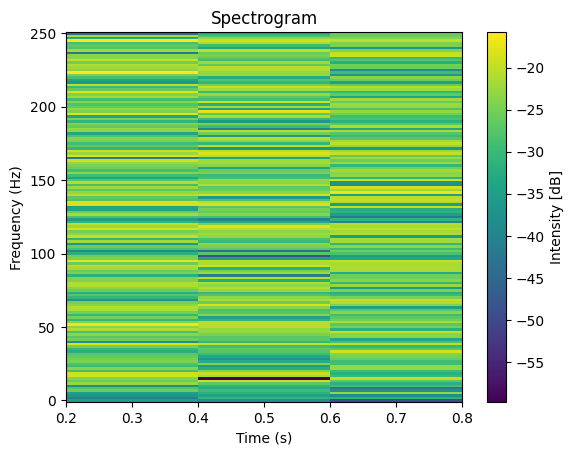

In [69]:
f1, t1, Sxx1 = make_spectrogram(signal3, 500)
plt.pcolormesh(t1,f1, Sxx1,shading='nearest', cmap='viridis')
plt.colorbar(label='Intensity [dB]')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram')
plt.show()

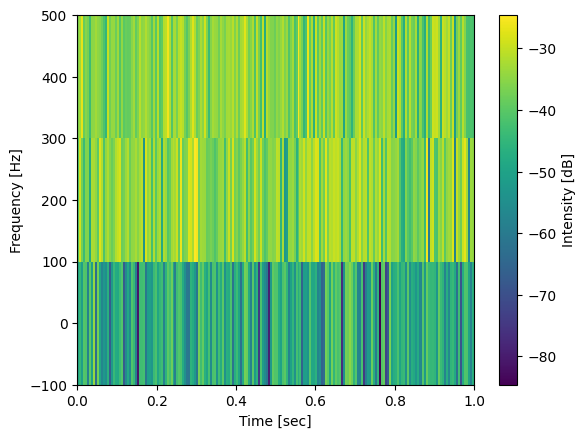

In [ ]:
# Пример

# Блок №2. Повышенный уровень

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
from scipy.io import wavfile

## **Задание 1: Чтение и визуализация звукового файла**











В этом задании вам нужно использовать функцию `wavfile.read` из модуля `scipy.io` для чтения звукового файла. Эта функция возвращает частоту дискретизации и данные аудиосигнала. Затем вы должны визуализировать эти данные с помощью `matplotlib.pyplot.plot`. В результате вы получите график амплитуды звукового сигнала во времени.

1. Используйте библиотеку `scipy.io.wavfile` для чтения звукового файла.

In [85]:
from scipy.io import wavfile
import scipy.io
path = 'dataset/Eiffel_65.wav'
rate, data = wavfile.read(path)

2. Визуализируйте временную форму звукового сигнала.

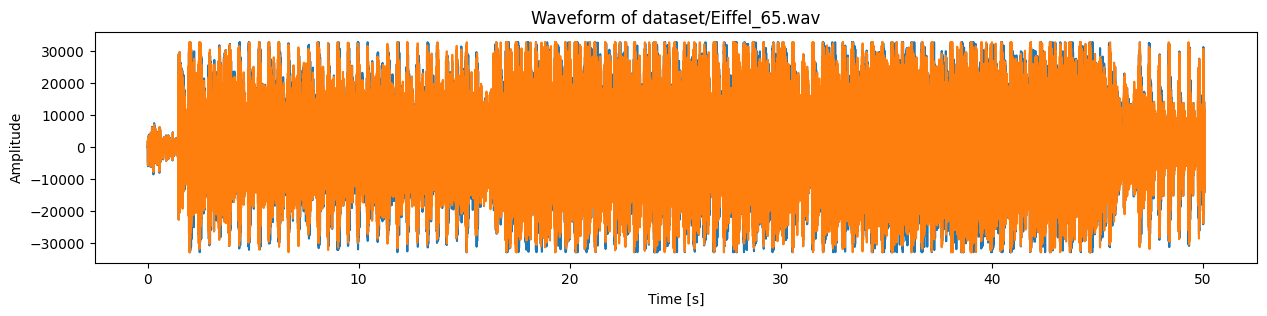

In [86]:
time = np.arange(len(data)) / rate
plt.figure(figsize=(15, 3))
plt.plot(time, data)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Waveform of %s' % path)
plt.show()

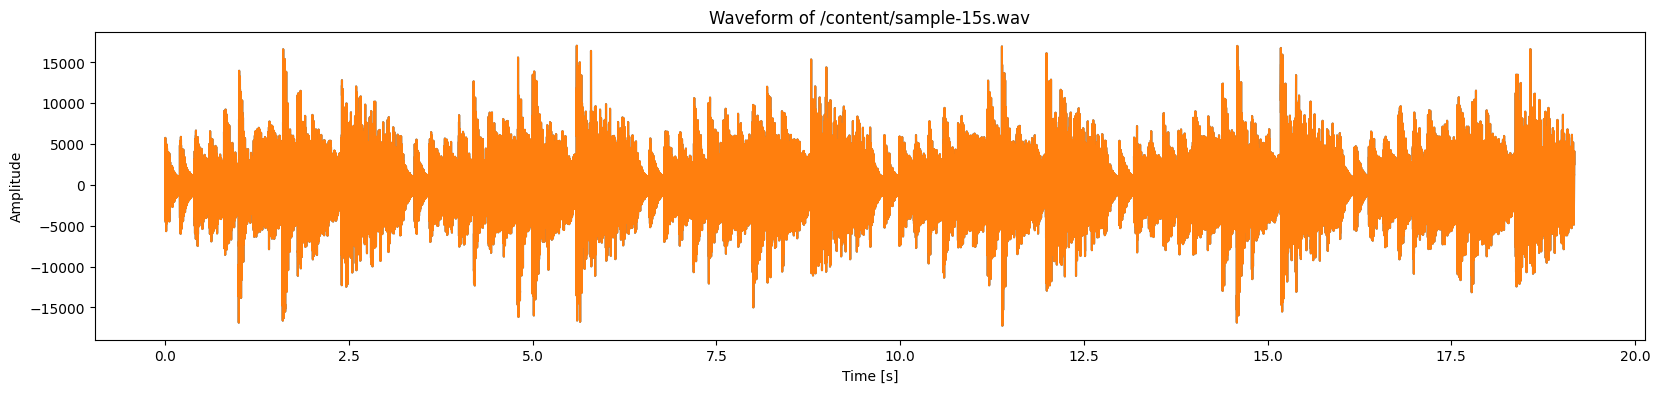

In [ ]:
# Пример

## **Задание 2: Применение преобразования Фурье**



Преобразование Фурье позволяет перейти от временного представления сигнала к частотному. Для его применения вы можете использовать функцию `fft` из модуля `scipy.fft`. Эта функция возвращает комплексные коэффициенты преобразования Фурье, которые затем можно визуализировать.

1. Примените преобразование Фурье к звуковому сигналу и визуализируйте спектр.

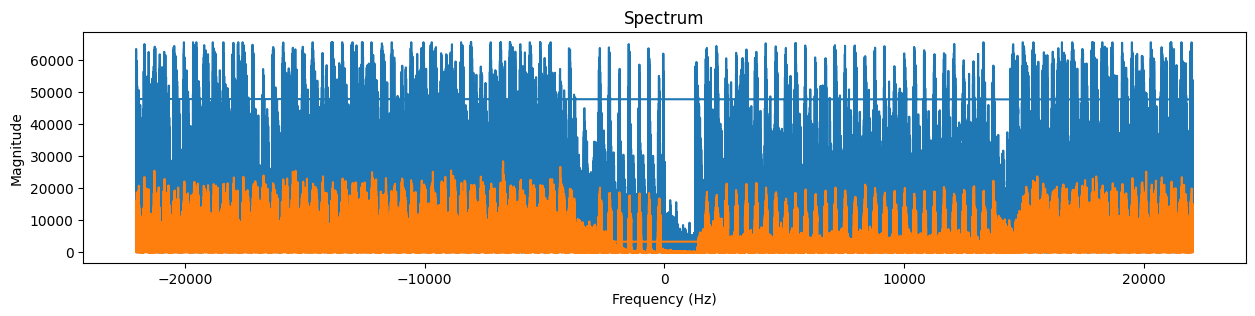

In [88]:
fft_data = fft(data)
fft_freq = fftfreq(len(data), 1 / rate)

plt.figure(figsize=(15, 3))
plt.plot(fft_freq, np.abs(fft_data))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Spectrum')
plt.show()

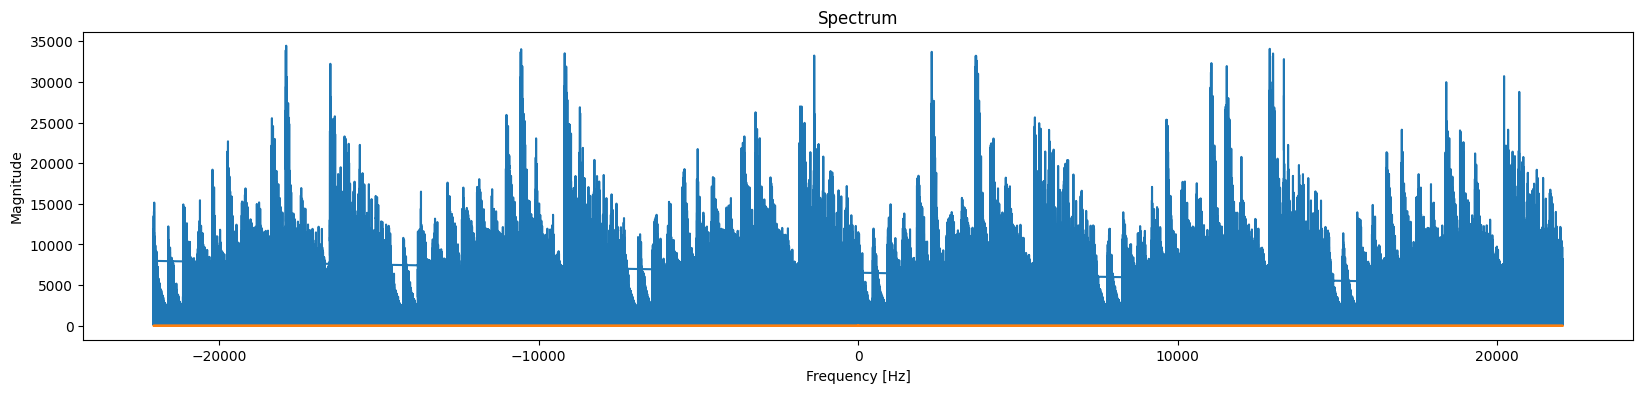

In [ ]:
# Пример

## **Задание 3: Фильтрация сигнала**



Фильтрация сигнала позволяет улучшить качество звука, убрав нежелательные частоты. Для этого вы можете использовать преобразование Фурье, затем обнулить некоторые из его коэффициентов и выполнить обратное преобразование Фурье с помощью функции `ifft` из модуля `scipy.fft`.

1. Создайте функцию для фильтрации сигнала с использованием преобразования Фурье.


In [166]:
# Это не совсем фильтрация, скорее жуткое зашумление, с прикольным эффектом
def filter(signal, min_freq, max_freq, sample_rate):
    filtered_signal = np.zeros_like(signal)
    for channel in range(signal.shape[1]):
        frequencies = fftfreq(len(signal), 1/sample_rate)
        
        mask = np.ones_like(frequencies)
        mask_indices = np.where((frequencies >= min_freq) & (frequencies <= max_freq))[0]
        mask[mask_indices] = np.random.normal(0, 1, len(mask_indices))

        filtered_fft = fft(signal[:, channel]) * mask
        filtered_signal[:, channel] = ifft(filtered_fft).real

    return filtered_signal

2. Примените эту функцию к звуковому сигналу и визуализируйте результаты до и после фильтрации.

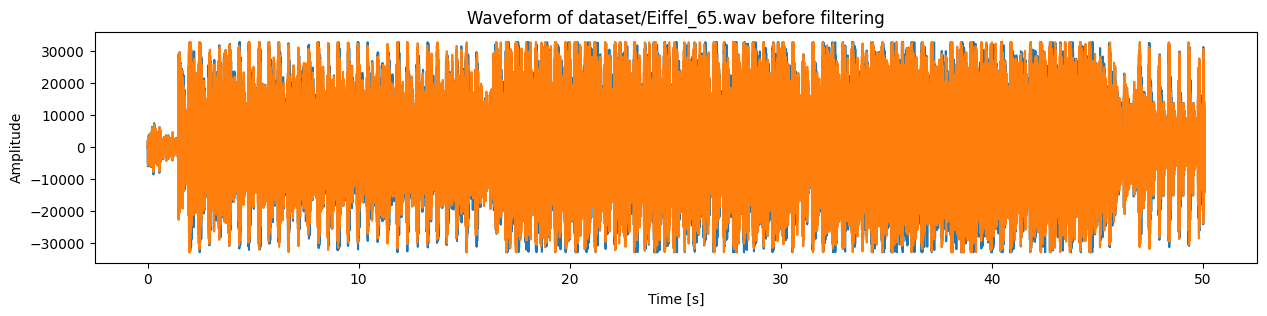

In [90]:
plt.figure(figsize=(15, 3))
plt.plot(time, data)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Waveform of %s before filtering' % path)

plt.show()

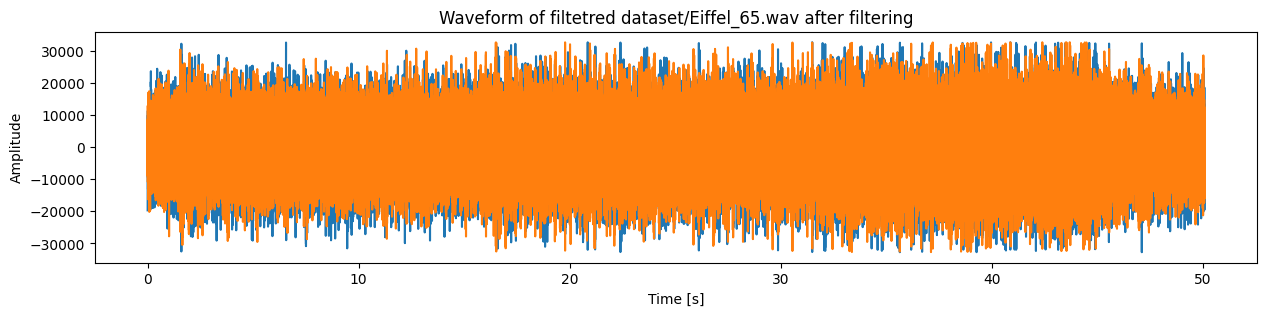

In [162]:
filtered_data = filter(data,-150, 150, rate/10)
plt.figure(figsize=(15, 3))
plt.plot(time, filtered_data)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Waveform of filtetred %s after filtering' % path)

plt.show()

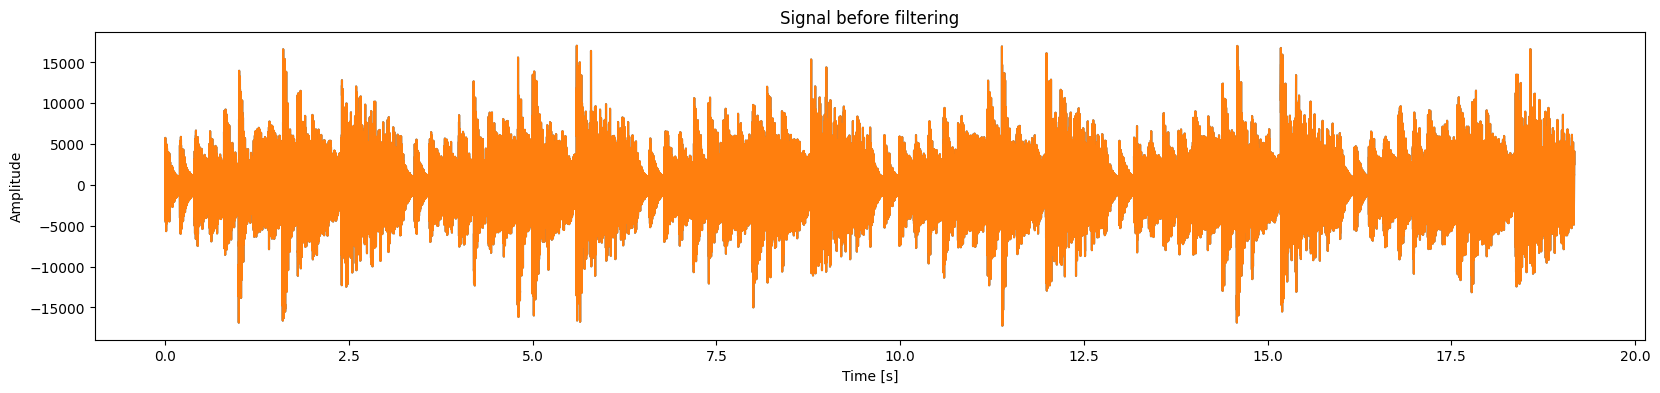

In [ ]:
# Визуализация сигнала до фильтрации

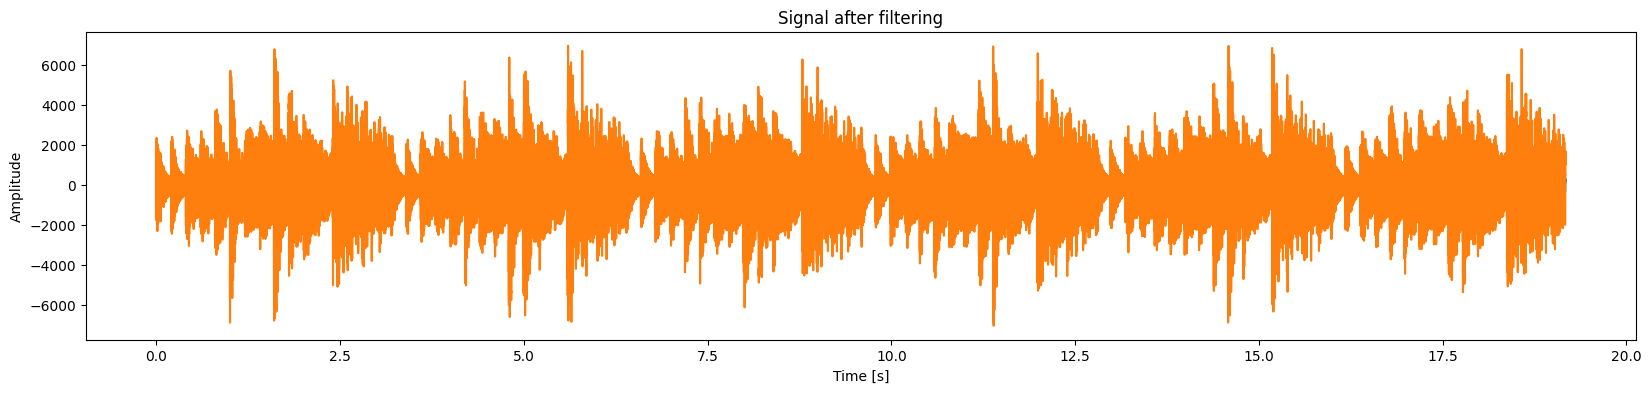

In [ ]:
# Визуализация сигнала после фильтрации

## **Задание 4: Обратное преобразование Фурье**



После фильтрации сигнала вы можете применить обратное преобразование Фурье для получения отфильтрованного звукового сигнала во временной области. Затем вы можете сохранить этот сигнал в новый звуковой файл с помощью функции `wavfile.write` из модуля `scipy.io`.

1. Примените обратное преобразование Фурье к отфильтрованному сигналу.


In [164]:
ifft_signal = ifft(filtered_data)
ifft_signal = ifft_signal.real.astype(np.int16)

2. Сохраните полученный сигнал в новый звуковой файл.

In [165]:
wavfile.write('dataset/Eiffel_65_xexexe.wav', rate, ifft_signal)